In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab import files
from PIL import Image
import io

In [ ]:
uploaded = files.upload()
for file in uploaded.keys():
    img = cv2.imdecode(np.frombuffer(uploaded[file], np.uint8), cv2.IMREAD_COLOR)

Saving TajMahal.jpeg to TajMahal.jpeg


In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

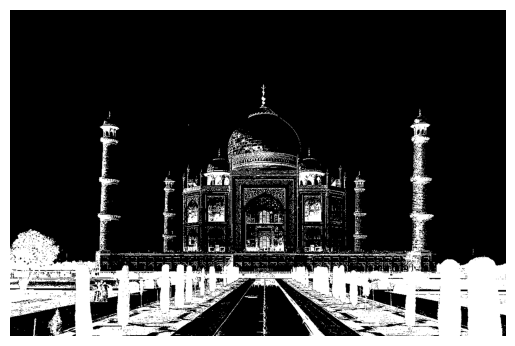

In [ ]:
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.show()


In [ ]:
kernel = np.ones((9, 9), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=3)
bg = cv2.dilate(closing, kernel, iterations = 2)


In [ ]:
contours, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
result = np.zeros(gray.shape, dtype=np.uint8)
for contour in contours:
    if cv2.contourArea(contour) > 1000:
        cv2.fillPoly(result, [contour], 255)


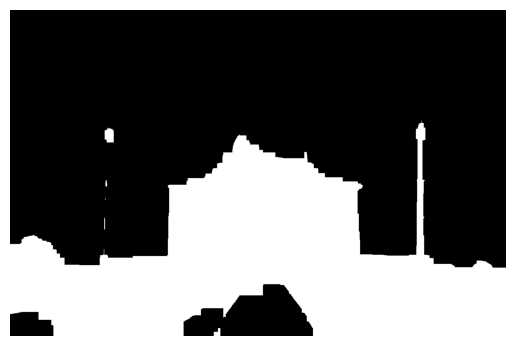

In [ ]:
kernel_open = np.ones((6, 6), np.uint8)
opened_result = cv2.morphologyEx(result, cv2.MORPH_OPEN, kernel_open, iterations=2)

kernel_erode = np.ones((9, 9), np.uint8)
final_result = cv2.erode(opened_result, kernel_erode, iterations=2)
plt.imshow(final_result, cmap='gray')
plt.axis('off')
plt.show()
